In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv(r'D:\Github projects\Titanic-dataset-solution-with-data\train.csv')
test_df = pd.read_csv(r'D:\Github projects\Titanic-dataset-solution-with-data\test.csv')
labels = train.Survived

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### So there are three columns with missing value that is Age, Cabin and Embarked. Among them Cabin has very less values so I might reject it all together. 

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data-Visualisation

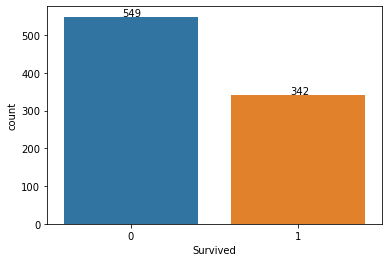

In [6]:
ax = sns.countplot(train['Survived'])
for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

So aparently, more number of people died and less people were able to survive. Percentage wise ****(549/891)*100 = 61%***** of the people were not able to survive 

In [8]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

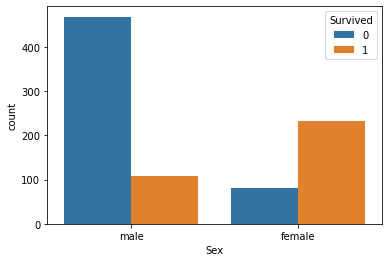

In [6]:
sns.countplot(train['Sex'],hue ='Survived',data=train)

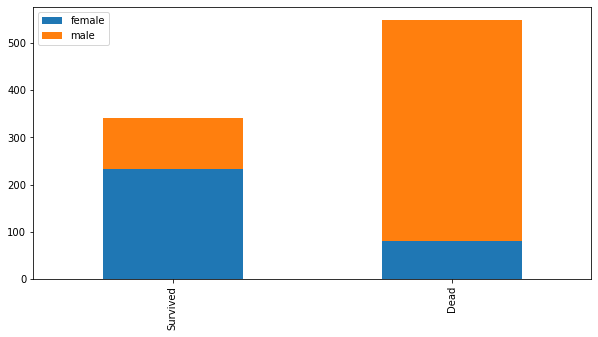

In [9]:
bar_chart('Sex')

#### Insights from this:- 
1. More than 450 men have died
2. Around 100 men were able to survive
3. Around 250 female survived 
4. Less than 100 females died 
5. Chances of survival for females were more than that of male .

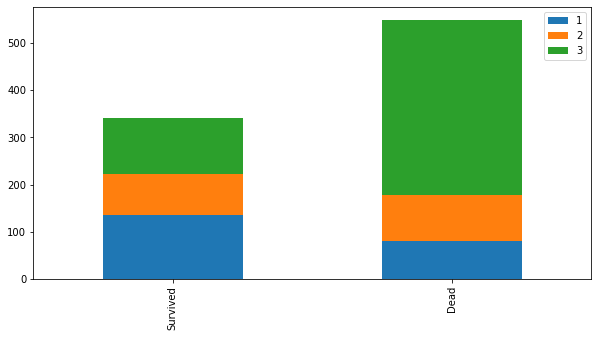

In [10]:
bar_chart('Pclass')

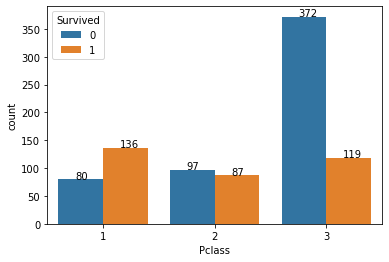

In [11]:
ax =  sns.countplot(train['Pclass'],hue ='Survived',data=train)
for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [12]:
print("Survival percentage of passenger in 1st class - ", (134/(134+80)*100))
print("Survival percentage of passenger in 2nd class - ", (87/(87+97)*100))
print("Survival Percentage of passenger in 3rd class - ", (119/(119+372)*100)) 

Survival percentage of passenger in 1st class -  62.616822429906534
Survival percentage of passenger in 2nd class -  47.28260869565217
Survival Percentage of passenger in 3rd class -  24.236252545824847


Insights from this:- 
1. Passengers had much higher chance of survival around 63 %  if they travelled in first class .
2. Passengers who travelled in second class had a survival chance of 47%
3. Passengers had much lower chance of survival around 24 % if they travelled in third class .

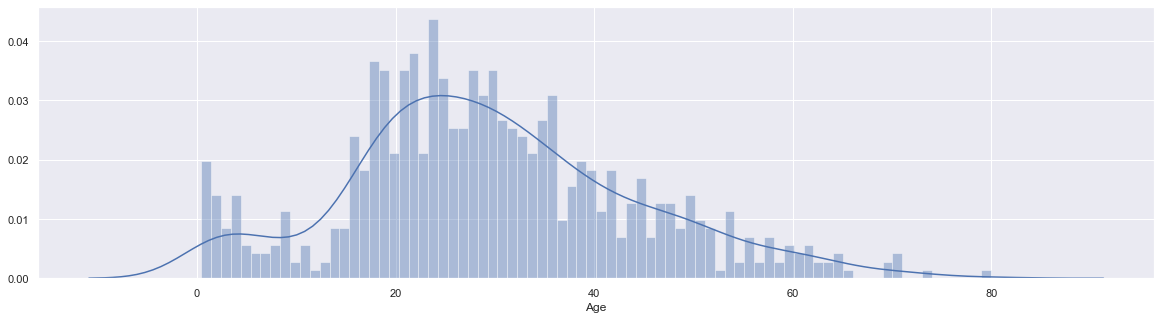

In [11]:
plt.figure(figsize=(20,5))
#sns.set(style="darkgrid")
sns.distplot(train['Age'], bins = 80)

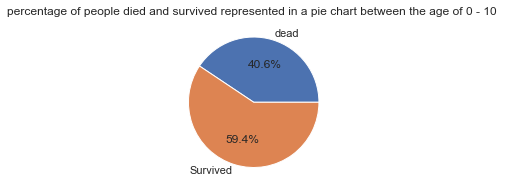

In [13]:
def age_pie(x,y,title):
    total_010 = train.loc[(train.Age >= x) & (train.Age <= y) ]['Survived'].count()
    survived_010 = train.loc[(train.Age <= y) & (train.Age >= x)]['Survived'].sum()
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    ax.pie(x=[total_010 - survived_010,survived_010],labels = ['dead','Survived'], autopct='%1.1f%%')
    ax.set_title(title)
age_pie(0,10,'percentage of people died and survived represented in a pie chart between the age of 0 - 10 ')


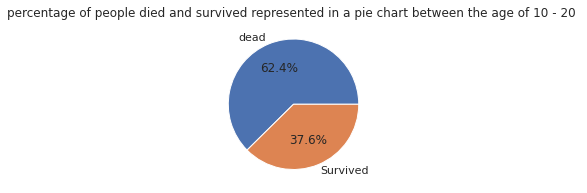

In [15]:
age_pie(10,20,'percentage of people died and survived represented in a pie chart between the age of 10 - 20 ')

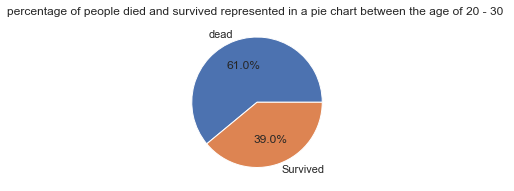

In [14]:
age_pie(20,40,'percentage of people died and survived represented in a pie chart between the age of 20 - 30 ')


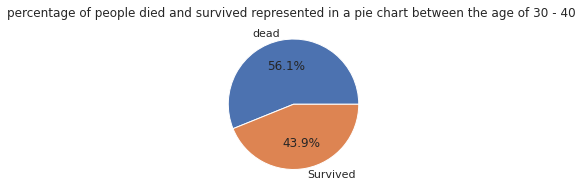

In [17]:
age_pie(30,40,'percentage of people died and survived represented in a pie chart between the age of 30 - 40 ')

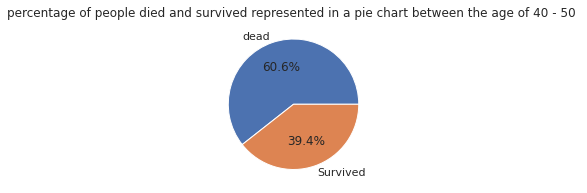

In [18]:
age_pie(40,50,'percentage of people died and survived represented in a pie chart between the age of 40 - 50 ')

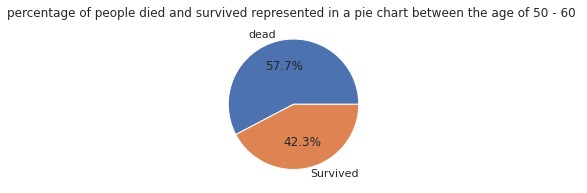

In [19]:
age_pie(50,60,'percentage of people died and survived represented in a pie chart between the age of 50 - 60 ')

Insights from this - 
1. People aged 1 to people aged 80 were in the titanic
2. Most of the people was between the range of 16 to 40 
3. Maximum number of people were 23 or 24 years old. 
4. Chances of death was maximum betwwen 20 - 30 had a percentage of 65 % 
5. In the other age groups the chances of death was around 60 % 

Here SibSp stands for siblings or spouse and ParCh stands for parents and children. This column shows whether the passenger had any parent or spouse or children or siblings

In [15]:
train['SibSp'].nunique()

7

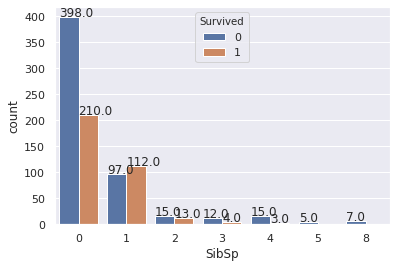

In [20]:
ax = sns.countplot(train['SibSp'],hue ='Survived',data=train)
for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+1))


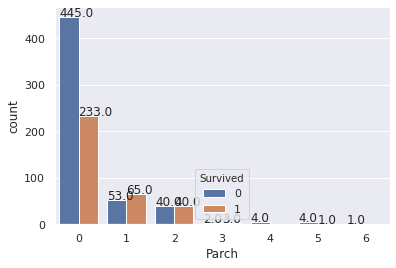

In [21]:
ax = sns.countplot(train['Parch'],hue ='Survived',data=train)
for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+1))


c:\users\sayantan\miniconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


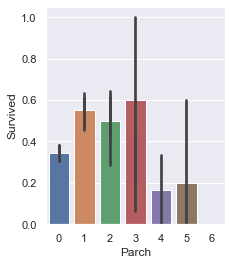

In [16]:
plt.figure(figsize=(8,4))
plt.subplot(122)
sns.barplot(train.SibSp, train.Survived)
plt.subplot(122)
sns.barplot(train.Parch, train.Survived)
plt.subplots_adjust(wspace=0.5)


Insights from here - 
1. Most of the people travelled alone or with 1 or 2 sibling or 1 spouse. 
2. People travelling alone had more chances of not surviving than people travelling with 1 or 2 person. 
3. Around 75 % of the people travelled alone without parents or children.

Lets analyze the fare column and then we will move on to data pre processing 

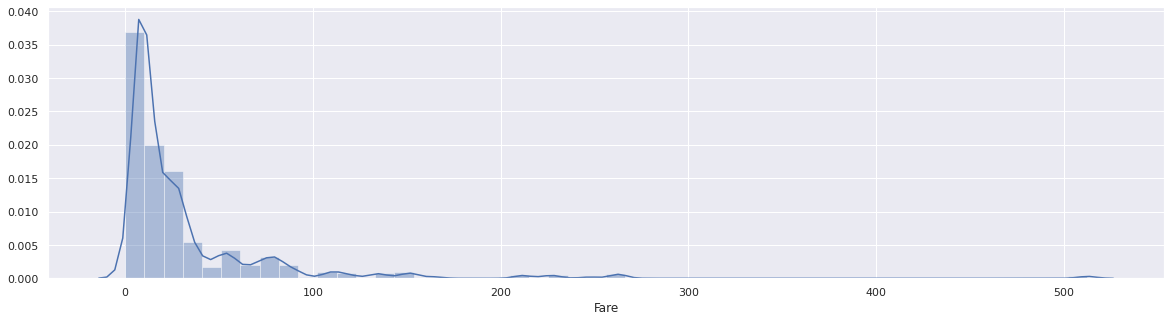

In [23]:
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
sns.distplot(train['Fare'])

The kernel density estimation curve shows the distribution of the fare that the passenger has given. 

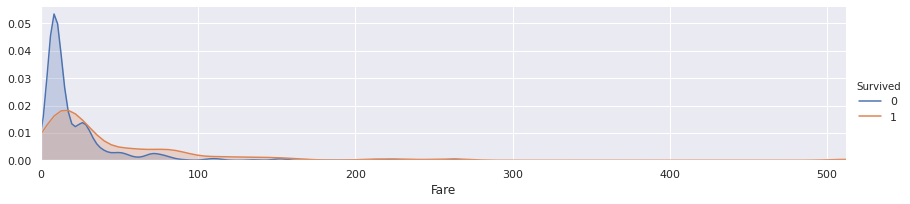

In [24]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

Insights from this - 
1. So fair prices were more or less around 0 to 50 
2. Maximum number of people paid a fare of  10 
3. Very few people paid a fare more than  500 

So after the exploration I have selected 6 features which are Pclass, Age, Gender, fare, SibSp(sibling or spouse ) and Parch ( parent or children)

Features Ignored - 
1. passengerID - I don't think passenger Id has much importance in the deciding whether the passenger died or not 
2. Name - Same reason as above 
3. Cabin - I rejected it as most of the cabin value is missing. 
4. Embarked - Embarked means from where the passenger has boarded the titanic,it may have some indirect effect but surely will not effect the prediction directly

## Data cleaning and processing

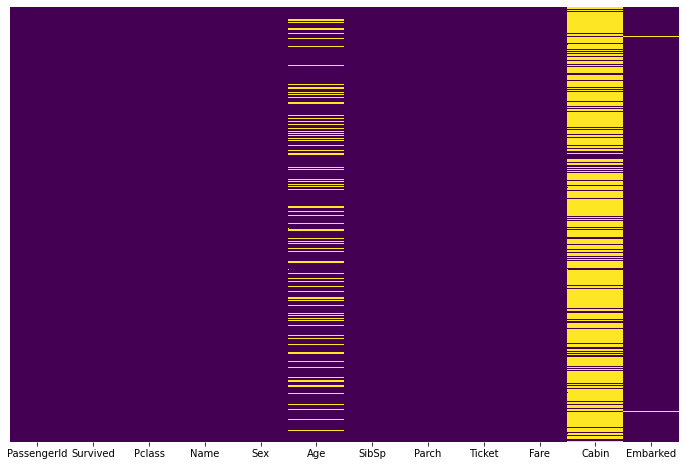

In [9]:
plt.figure(figsize=(12,8))

sns.heatmap(train.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [10]:
train.Age.mean()

29.69911764705882

Lets start handling the missing values from the Age column

In [11]:
train.Age.isnull().sum()

177

Now there are lots of ways to handle the missing values, for example I can replace the missing values with the help of mean or median, or can replace with random samples or we replace it with some values at the end of the distribution. 
In this one what I am going to do is basically replace the age with the help of mean but based on their Pclass.
For example, the mean of the Age of people in class 1 was around 37 so the person whose age was missing and he was in class 1 I will replace it with 37 instead of the overall mean age which is 29. 

In [12]:
train.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [13]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else: return 25
    else: return Age

In [14]:
train['Age']=train[['Age','Pclass']].apply(inpute_age, axis=1)

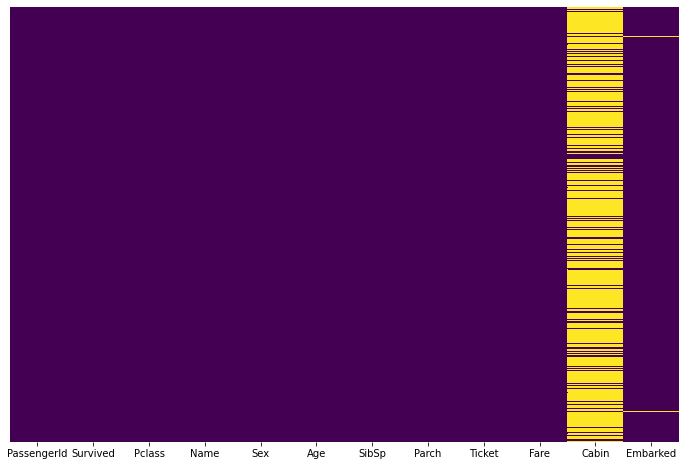

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cbar=False, yticklabels=False, cmap='viridis')

#### So I have cleaned the Age column.
Next what I will do is basically drop the embarked column because there is not much direct correlation to it with the survival of the passenger. 

In [16]:
train.drop('Embarked', axis=1, inplace=True)

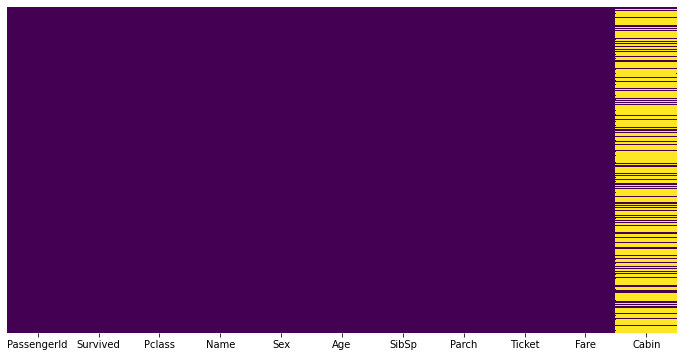

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),cbar=False, yticklabels=False, cmap='viridis')

Now lets move onto the Cabin column which is bit trcky to deal with because there is a correlation between the missing values and survival. The first question that comes to the mind is that why such a huge number of data for this column is missing. This is cannot be because of human error or miss calculation. But the if we replace the missing values with the highest number of occuring one then it will make the dataset imbalanced. And will not have much advantage.


In [18]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
F2             3
              ..
D10 D12        1
B82 B84        1
B73            1
B19            1
A24            1
Name: Cabin, Length: 147, dtype: int64

Now the column is a categorical variable so i cannot make mean median imputation. So instead I will drop the column

In [19]:
train.drop('Cabin', axis=1, inplace=True)

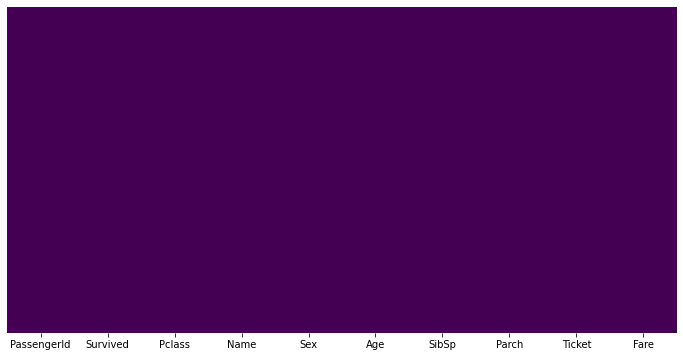

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [22]:

train['Male'] = pd.get_dummies(train['Sex'], drop_first=True)

In [23]:
train.drop(['PassengerId', 'Name', 'Sex', 'Ticket'], axis=1, inplace=True)

In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Male      891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Male      891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [27]:
#Seperate the feature columns from the target column
X = train.drop('Survived', axis=1)
y = train['Survived']

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   Male    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 35.8 KB


In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
x_train, x_test,y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, n_estimators=14)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [33]:
score = clf.score(x_test,y_test)
print("accuracy", round(score,2)*100)

accuracy 84.0


In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [50]:
score = clf.score(x_test,y_test)
print("accuracy", round(score,2)*100)

accuracy 80.0


In [51]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [52]:
#Clean the test data the same way we did the training data
test_df['Age']=test_df[['Age','Pclass']].apply(inpute_age, axis=1)
test_df.drop('Cabin', axis=1, inplace=True)
test_df['Male'] = pd.get_dummies(test_df['Sex'], drop_first=True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
 6   Male    418 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(1)
memory usage: 20.1+ KB


In [54]:
test_df.drop(['Sex'], axis=1, inplace=True)

In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   Male    418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 16.9 KB


In [56]:
test_df.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
Male      0
dtype: int64

In [57]:
mean = test_df.Fare.mean()

In [58]:
test_df['Fare'] = test_df.Fare.fillna(mean)

In [59]:
test_df.Fare.isnull().sum()

0

In [60]:
y_prediction = clf.predict(test_df)

In [61]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
pass_ids = test['PassengerId']

In [62]:
submission = pd.DataFrame({
        "PassengerId": pass_ids,
        "Survived": y_prediction
    })
submission.to_csv('titanic.csv', index=False)

If you have made it this far then thank you so much for your time, if it helped you or you liked please considering upvoting 
And if you have some suggestions or things that I can improve, please let me know in the comments 
